In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    

In [2]:
import cv2

from MagicPoint.dataset.art_dataset import *
from common.utils import plot_images, load_config, to255scale

%load_ext autoreload
%autoreload 2
%matplotlib inline


In [3]:
config = load_config('../configs/art_config_notebooks.yaml')
data_config = config['data']

dataset = ArtificialDataset(TEST, data_config)


[0. 1.]
[0. 1.]
[0. 1.]


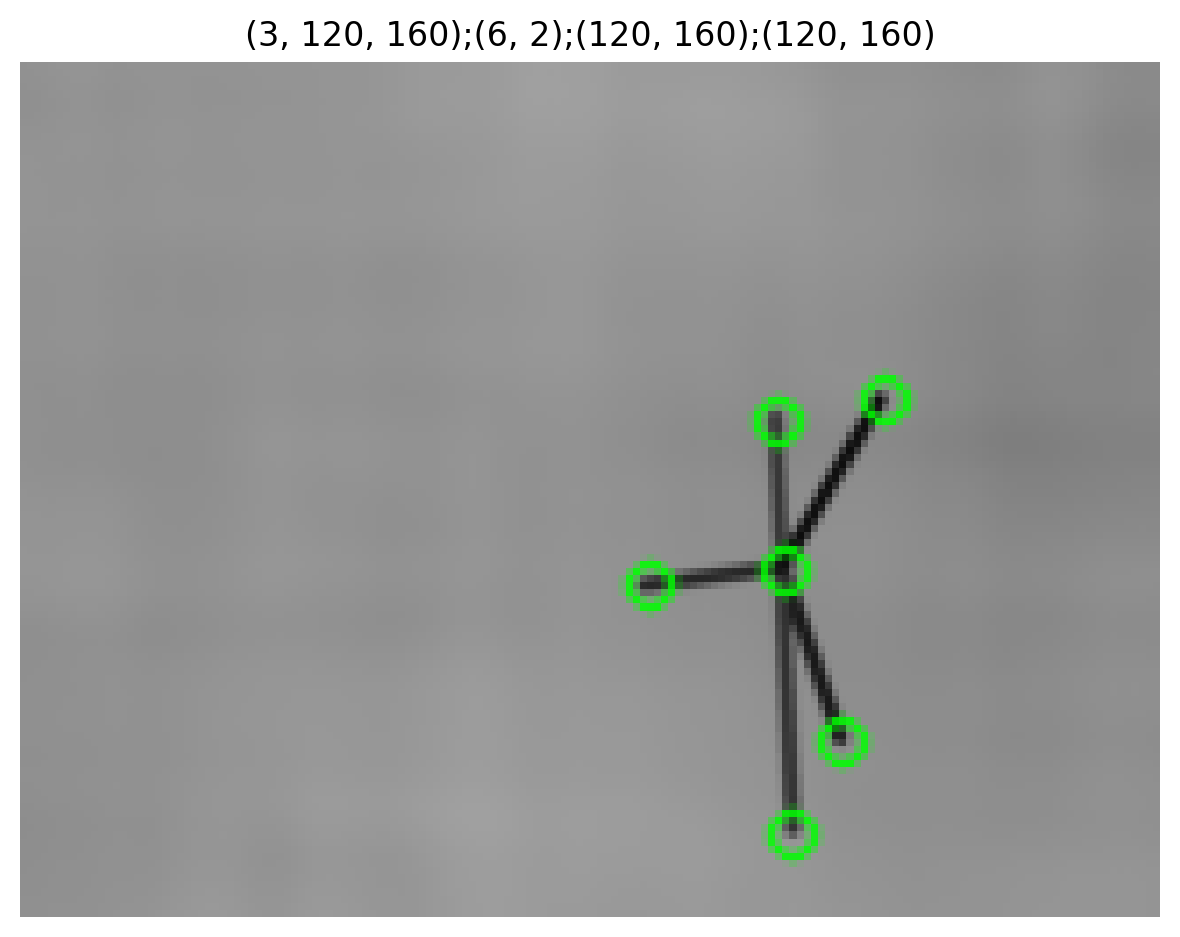

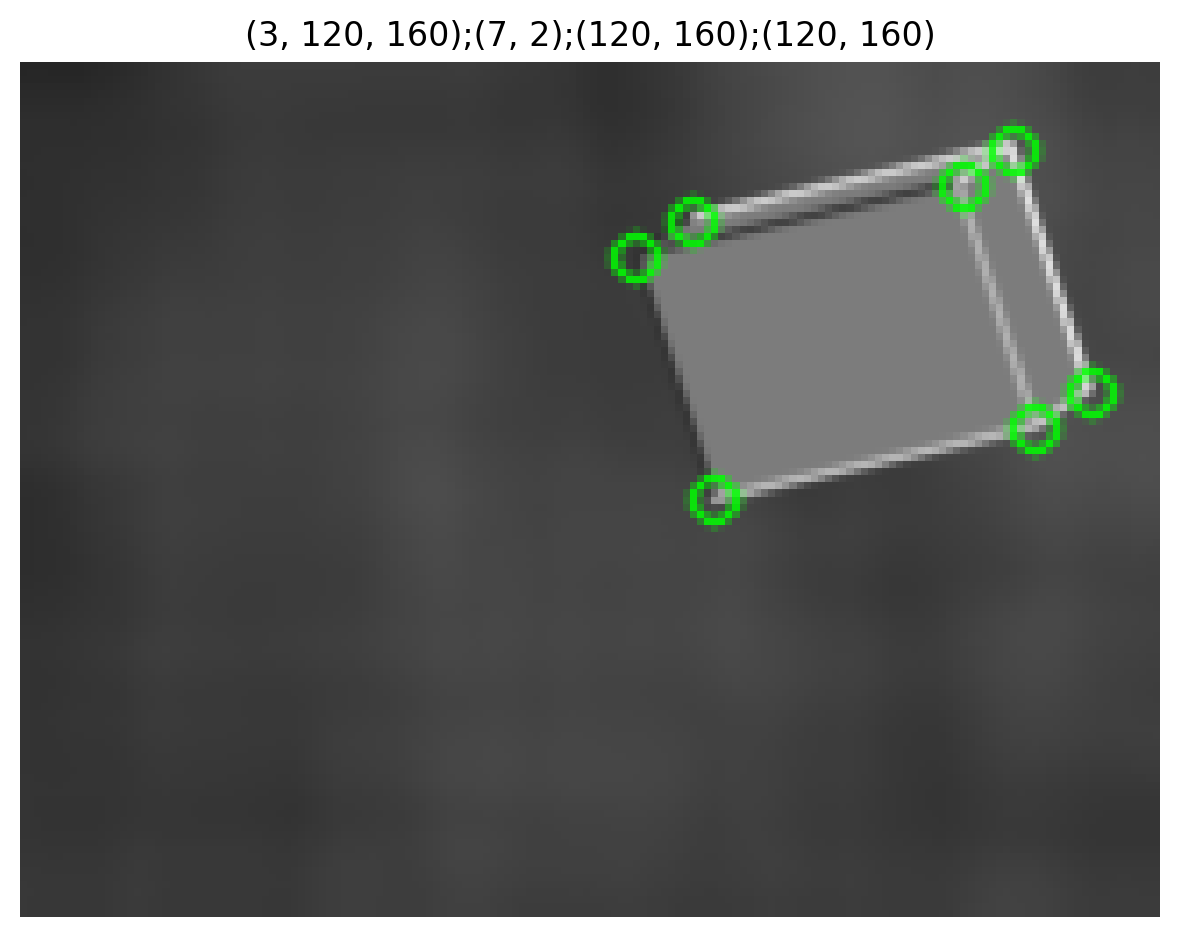

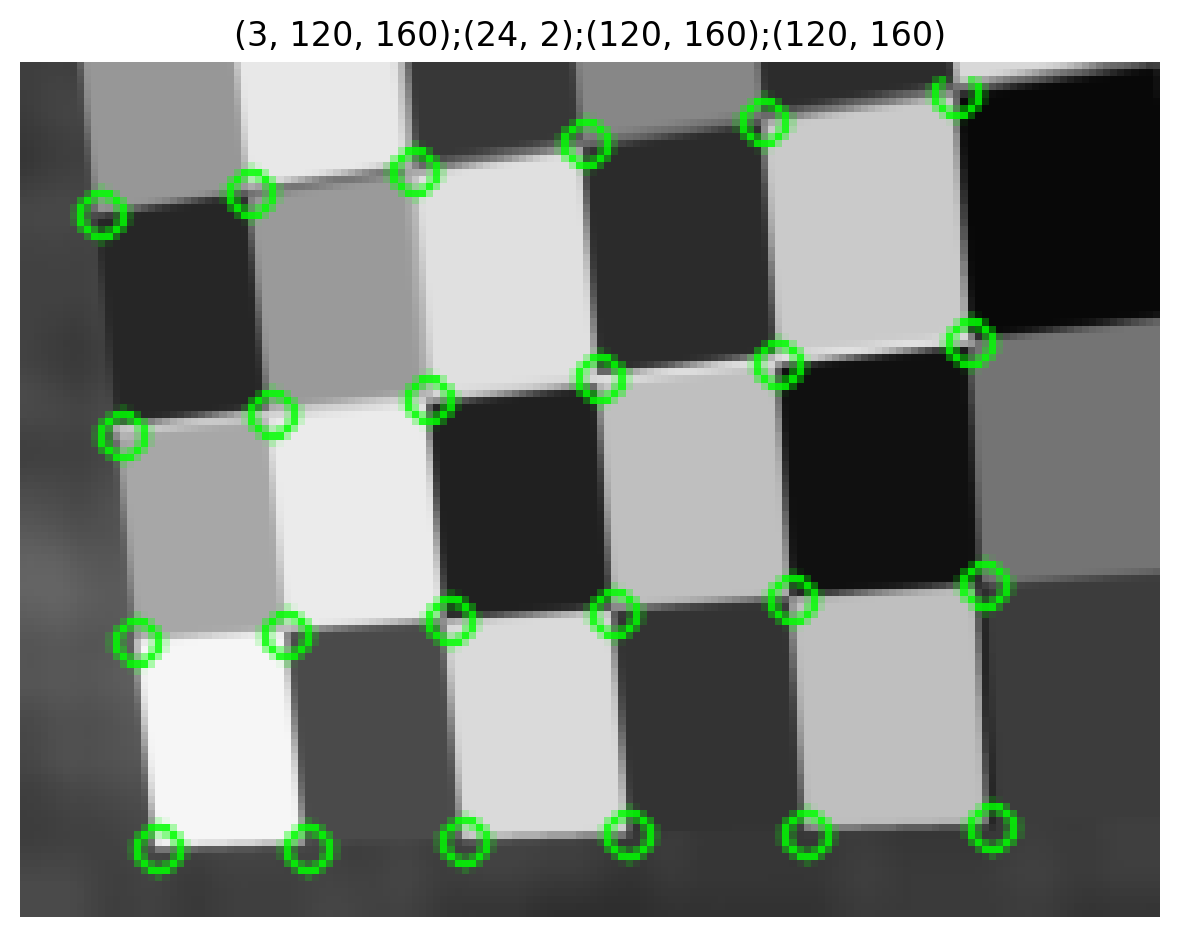

In [6]:

rows = 3

for _ in range(rows):
    frames = []
    titles = []
    
    index = np.random.randint(low=0, high=dataset.__len__())
    item = dataset.__getitem__(index)
    
    title = "{};{};{};{}".format(item[IMAGE].shape, item[POINTS].shape, item[KEYPOINT_MAP].shape, item[MASK].shape)
    image = to255scale(item[IMAGE]).transpose((1, 2, 0))
    
    frame_keypoints = [cv2.KeyPoint(c[1], c[0], 1) for c in np.stack(np.where(item[KEYPOINT_MAP])).T]
    frames.append(cv2.drawKeypoints(image, frame_keypoints, None, color=(0, 255, 0)))
    
    titles.append(title)
    
    plot_images(frames, titles, dpi=200)
